<a href="https://colab.research.google.com/github/LucasVCorrea/Data-Science/blob/main/mushrooms_analisis/analisis_exploratorio_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import seaborn as sns
from google.colab import drive
import matplotlib as mpl
from matplotlib import pyplot as plt
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
data_frame = pd.read_csv("/content/drive/MyDrive/Organizacion De Datos/trabajo_practico_2/secondary_data.csv",sep=";")

In [47]:
data_frame.head(1)

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w


In [48]:
def mapear_shapes(caracter):
  traduccion = {
      'b':'bell',
      'c':'conical',
      'x':'convex',
      'f':'flat',
      's':'shunken',
      'p':'spherical',
      'o':'others'
  }
  return traduccion[caracter]

In [49]:
def mapear_class(caracter):
  traduccion = {
      'e':'edible',
      'p':'poisonous',
  }
  return traduccion[caracter]

In [50]:
data_frame["cap-shape"] = data_frame["cap-shape"].map(mapear_shapes)
data_frame["class"] = data_frame["class"].map(mapear_class)


In [65]:
grouped_by_class = data_frame.groupby(["class", "cap-shape"]).agg({"cap-shape":["count"]})

In [66]:
grouped_by_class = grouped_by_class.reset_index()
grouped_by_class.columns = ["class","shape", "total"]

[Text(0.5, 1.0, 'amount of mushrooms by shape')]

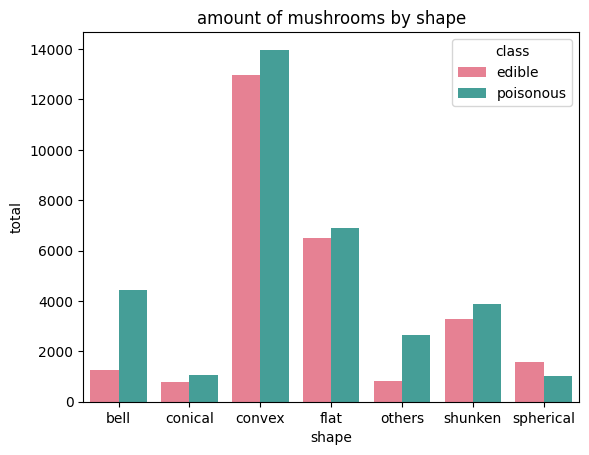

In [87]:
sns.barplot(data = grouped_by_class, x = 'shape', y = 'total' , hue = 'class' , palette='husl').set(title='amount of mushrooms by shape')